## Generate an exact solution with a very fine grid and a very small time steps 

In [2]:
## Error analysis with regards to time
import fenics
import numpy as np
import matplotlib.pyplot as plt
import typing
from typing import Callable, Tuple, List, Union
import pickle
from solver_alix import solver_para, solver_run
import time

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
#pylab.rcParams.update(params)


embedWindow(verbose=True): could not load ipyvtklink try:
> pip install ipyvtklink


### Choose a final time 

We do not want to loose too much time running the simulation too long after the temperature has plateau, therefore we plot the L2 norm at each time of the temperature. We decide that the temperature plateau at 2.5 seconds and therefore limits our analysis to that. 

Text(0.5, 1.0, '$\\|\\| u\\|\\|_2$')

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found

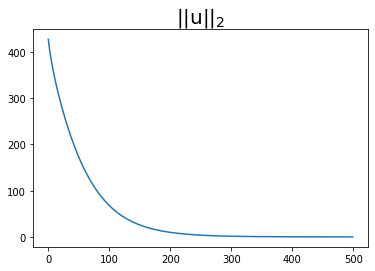

In [4]:
## Run the metropolis hasting algorithm
tau =1 #Value of tau
epsilon = 1/20 #
num_steps = 100 #number of time steps taken
T = 5 #final time 
nx = 10 #size of the grid
ny = 10 #size of the grid

## Generate the observed data
noise_star = 1 #noise added to the data
alpha_star = 0
Vmesh,mesh,u,v,u_n,f,u_D,bc= solver_para(nx,ny,tau)
u_star = solver_run(alpha_star,Vmesh,mesh,u,v,u_n,f,u_D,bc,tau, epsilon, num_steps, T)
time_vec = np.linspace(0,T,num_steps)

usquare = np.sum(u_star**2,1)
plt.plot(usquare)
plt.title("$\|\| u\|\|_2$", fontsize=20)

## Compute the error by looking at the difference at time T = 0.5, T = 1 and T = 2

The fine grid error is found by using a dt that is at least 10 times better than the lower one we think of using 

Text(0.5, 1.0, 'Adaptive time steps')

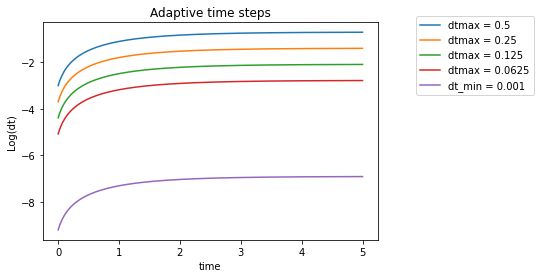

In [118]:
## getting an adaptive time steps 
dt = 0.1
t = np.linspace(0,T,int(T*100))
x = 1 
npower = np.array(range(1,5))
dt_list = 1/2**(npower)
dt_min = 1/1000
for dti in dt_list: 
    time_der = ((1-np.exp(-t/tau)) *0.9+0.1)*dti
    plt.plot(t,np.log(time_der),label = "dtmax = "+str(dti))

time_der = ((1-np.exp(-t/tau)) *0.9+0.1)*dt_min
plt.plot(t,np.log(time_der),label = "dt_min = "+str(dt_min))
plt.plot()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("time")
plt.ylabel("Log(dt)")
plt.title("Adaptive time steps")


### Compute the exact solution with the adaptive time steps dt_min = 1/1000

In [122]:
## Take a very fine time steps until T=2
## Run the metropolis hasting algorithm
tau =1 #Value of tau
epsilon = 1/20 #
num_steps = int(1/dt_min) #number of time steps taken
T = 2 #final time 
nx = 10 #size of the grid
ny = 10 #size of the grid

## Generate the observed data
noise_star = 1 #noise added to the data
alpha_star = 0
Vmesh,mesh,u,v,u_n,f,u_D,bc= solver_para(nx,ny,tau)
u_star = solver_run(alpha_star,Vmesh,mesh,u,v,u_n,f,u_D,bc,tau, epsilon, num_steps, T)


1000
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [27]:
nsteps=[5,10,50,100,500,1000,1500,2000,3000]

error_T05= []
error_T1 = []
error_T2 = []

for ni in nsteps: 
    Vmesh,mesh,u,v,u_n,f,u_D,bc= solver_para(nx,ny,tau)
    u_i = solver_run(alpha_star,Vmesh,mesh,u,v,u_n,f,u_D,bc,tau, epsilon, ni, T)

    ## Norm of the difference in values of u at time T 
    errorT = np.linalg.norm(u_star[-1,:] - u_i[-1,:])
    error_timeT.append(errorT)

    ## Norm of the difference in values of u at time T/2
    errorThalf= np.linalg.norm(u_star[int(num_steps/2),:] - u_i[int(ni/2),:])
    error_timeThalf.append(errorThalf)






Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [52]:
nsteps=np.linspace(2,9,8)
nx=ny=100
error_timeT = []
error_normAll = []
error_timeThalf = []

for ni in nsteps: 
    nti = int(2**ni)
    print(ni)
    Vmesh,mesh,u,v,u_n,f,u_D,bc= solver_para(nx,ny,tau)
    u_i = solver_run(alpha_star,Vmesh,mesh,u,v,u_n,f,u_D,bc,tau, epsilon, nti, T)

    ## Norm of the difference in values of u at time T 
    errorT = np.linalg.norm(u_star[-1,:] - u_i[-1,:])
    error_timeT.append(errorT)

    ## Norm of the difference in values of u at time T/2
    errorThalf= np.linalg.norm(u_star[int(num_steps/2),:] - u_i[int(ni/2),:])
    error_timeThalf.append(errorThalf)

print(np.shape(u_star))



2.0
3.0
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
4.0
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
5.0
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
6.0
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
7.0
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
8.0
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
9.0
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
(10000, 10201)


## Plot the results 
plt.plot(nsteps,error_timeT)


Text(0, 0.5, 'Error')

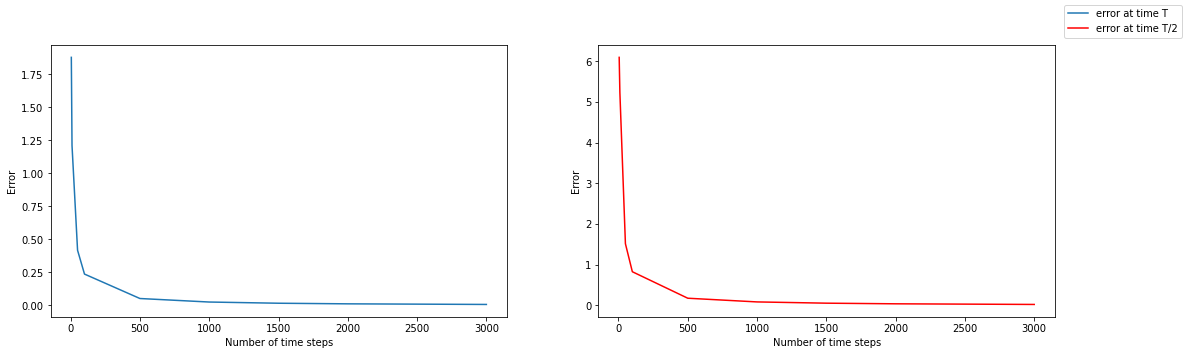

In [29]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 5)) #create the figure 
ax1.plot(nsteps,error_timeT,label="error at time T")#plot values of the element 0 of the chain 
ax2.plot(nsteps,error_timeThalf,color="red",label = "error at time T/2")
fig.legend()
fig.title("Error depending of the number of time steps taken")
ax1.set_xlabel("Number of time steps")
ax2.set_xlabel("Number of time steps")
ax1.set_ylabel("Error")
ax2.set_ylabel("Error")

#### Narrowing down the results 

Text(0, 0.5, 'Error')

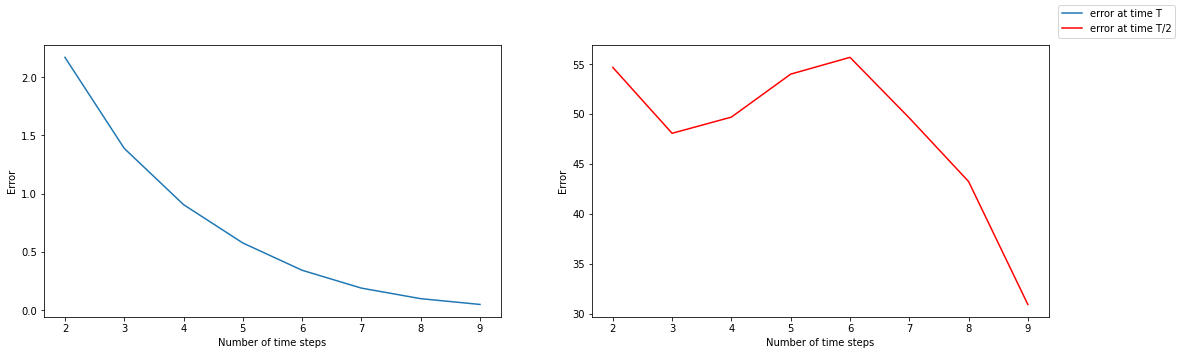

In [55]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 5)) #create the figure 
ax1.plot(nsteps,error_timeT,label="error at time T")#plot values of the element 0 of the chain 
ax2.plot(nsteps,error_timeThalf,color="red",label = "error at time T/2")
fig.legend()
ax1.set_xlabel("Number of time steps")
ax2.set_xlabel("Number of time steps")
ax1.set_ylabel("Error")
ax2.set_ylabel("Error")

### Select a time and compute the error in space

In order to do so, we need to compare the temperature at the same time in space despite the fact that the measure in space are different. In order to do so we use the two norm function provided by Fenics. We simply need to provide Fenics with the exact solution. For this purpose, we need to directly access the fenics element and design function that directly compute the error, with a solution. 
